In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [8]:

X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

pca = PCA(n_components=56, random_state=42)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)

In [14]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(X.data), 64))
X_w_noise = np.hstack([X.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape)
print(X_train_selected.shape)


(1775, 128)
(1775, 64)


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 14 25 26 35 39 59 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[False  True  True  True  True  True  True  True  True  True False False
  True  True False  True  True False  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False False  True
  True  True  True False False False False  True False False False  True
 False False  True False False False  True  True]


([], [])

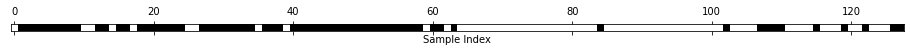

In [17]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks(())

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

rf_minmax = RandomForestClassifier(
    n_estimators=500,
    max_features=5,
).fit(X_train_minmax, y_train)


/var/folders/w5/ldwmktd90k7_zc47_06nfmy40000gp/T/ipykernel_18091/3939328947.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_minmax = RandomForestClassifier(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


(1775, 64)
(1775, 32)
0.8783783783783784


In [ ]:

select_rf = SelectFromModel(
    rf_minmax,
    threshold='median'
)

select_rf.fit(X_train_minmax, y_train)
X_select_rf = select_rf.transform(X_train_minmax)
print(X_train.shape)
print(X_select_rf.shape)
print(rf_minmax.score(X_test_minmax, y_test))

[False  True False  True  True  True  True  True False False False False
 False  True False False  True False False False  True  True  True False
 False False False False  True  True  True False False False  True False
  True False  True False  True  True False False  True  True  True False
  True False  True  True False False  True  True  True  True  True False
  True  True False False]


([], [])

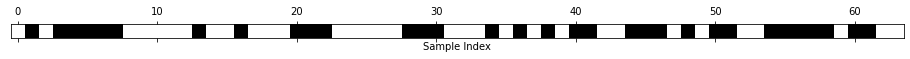

In [32]:

# select = SelectPercentile(percentile=50)
# select.fit(X_train, y_train)
# X_train_selected = select.transform(X_train)
# print(X_train.shape)
# print(X_train_selected.shape)

mask = select_rf.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks(())